In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
vg=pd.read_csv("/Users/Ayesha Sulthana/Documents/jupyter/Projects/python/vgales/vgsales.csv")
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg = vg.drop(vg[vg['Year'] > 2015].index)
vg.shape

(16250, 11)

In [5]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# 1. Which Genre game has made the most ?

In [9]:
vg['Genre'].value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

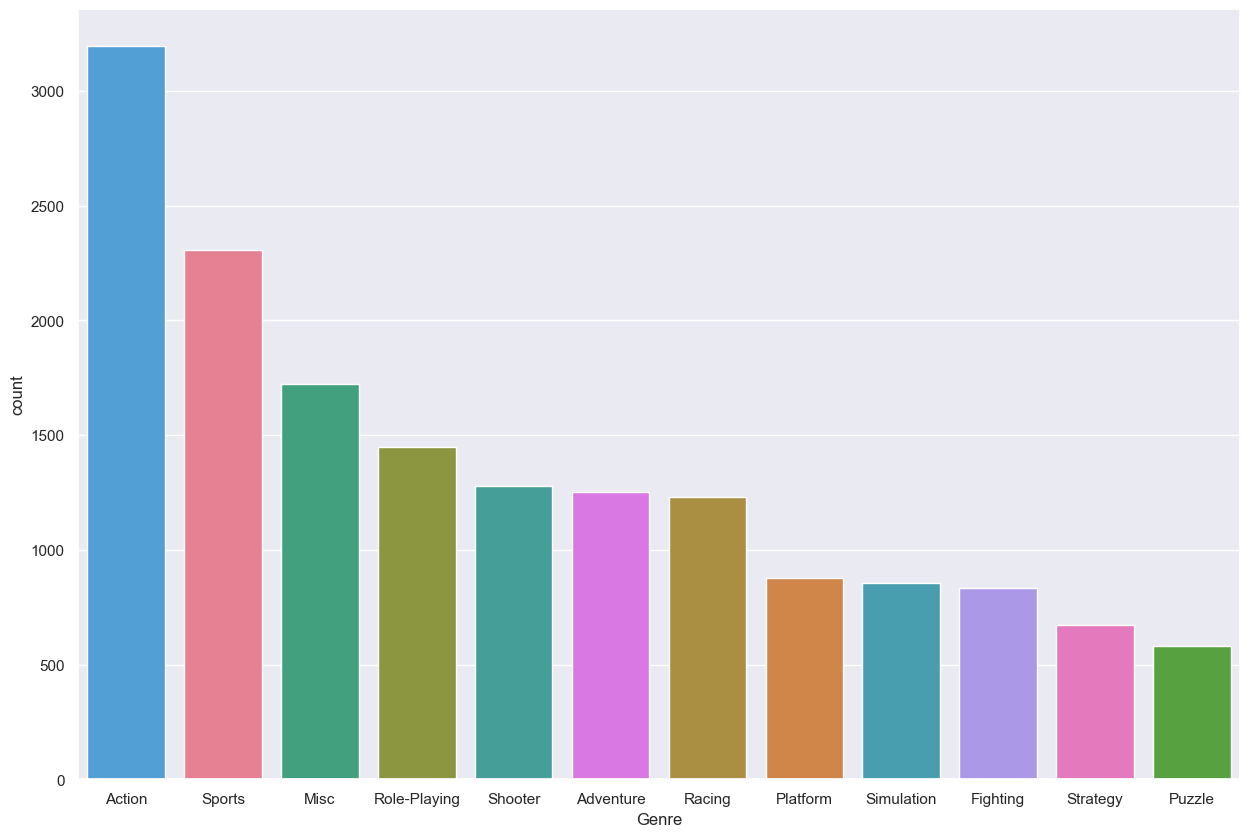

In [154]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre', data = vg, order = vg['Genre'].value_counts().index, hue='Genre')
plt.show()


# 2. Which year had the most game release ?

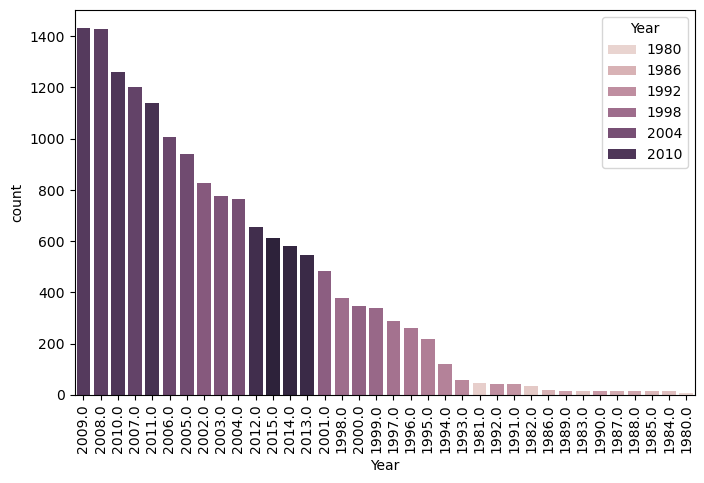

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x="Year", data=vg, order = vg.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, hue='Year')
plt.xticks(rotation=90)
plt.show()

# Top five year game releases by Genre 

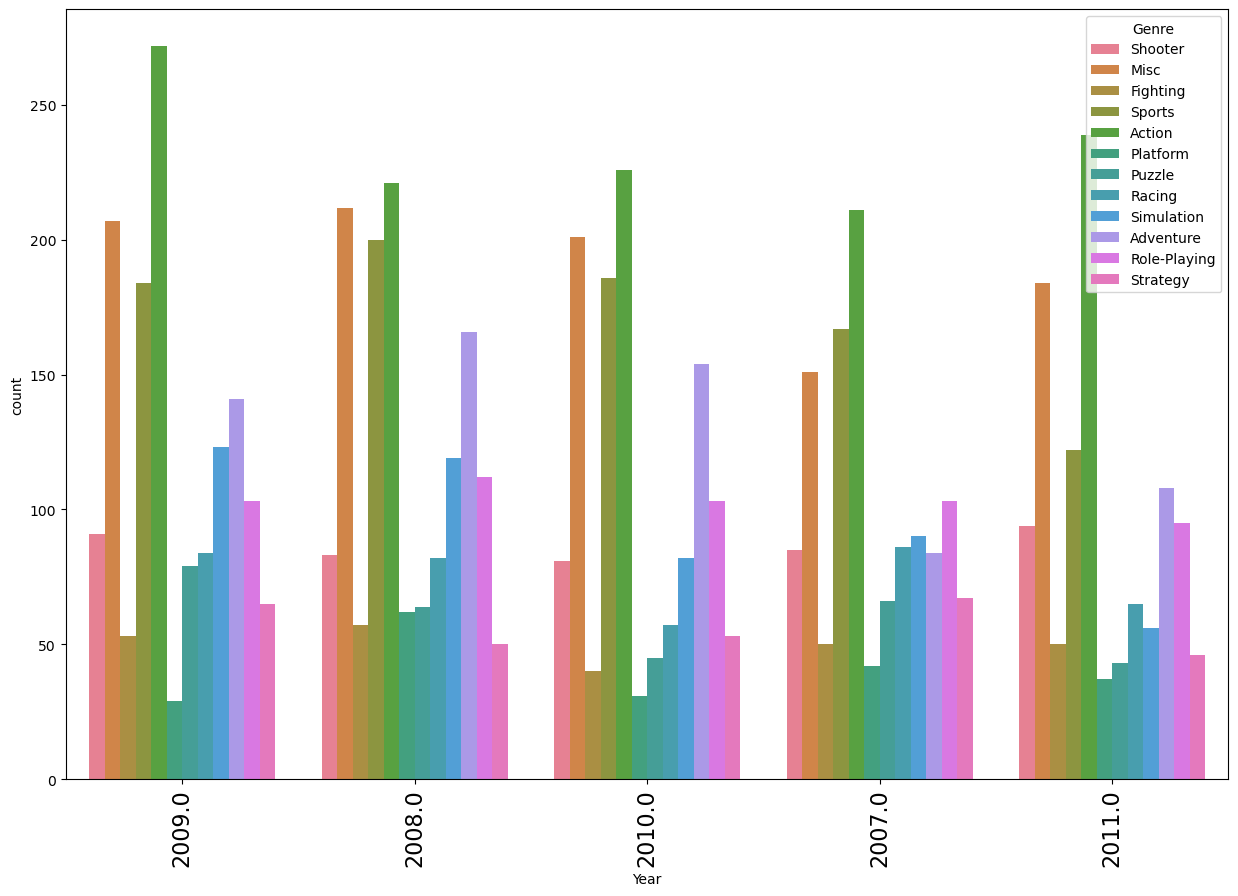

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year', data = vg, hue='Genre', order=vg.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)
plt.show()

# 4. Which year has the highest sales worldwide ?

In [16]:
vg_year = vg.groupby(by=['Year'])['Global_Sales'].sum()
vg_year=vg_year.reset_index()

C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9460\173770573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Global_Sales', data=vg_year, palette='Paired')


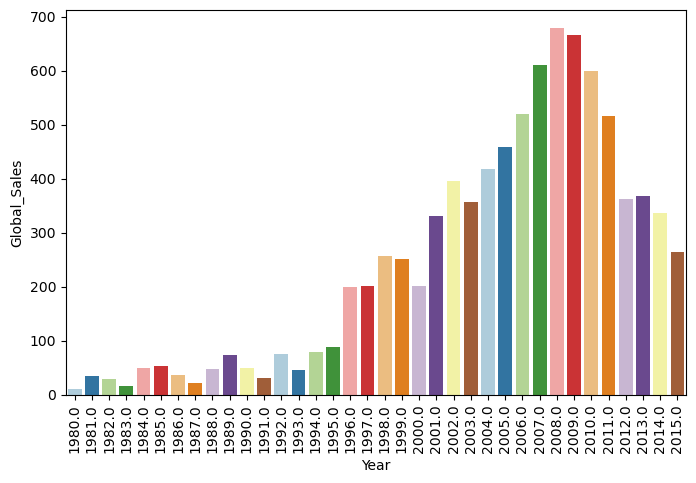

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Global_Sales', data=vg_year, palette='Paired')
plt.xticks(rotation=90)
plt.show()

# 5. Which genre game have the highest sale price globally ?

In [19]:
vg_genre=vg.groupby(by=['Genre'])['Global_Sales'].sum()
vg_genre=vg_genre.reset_index()
vg_genre=vg_genre.sort_values(by=['Global_Sales'], ascending=False)


C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9460\3112662521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Global_Sales',data=vg_genre,palette='cubehelix')


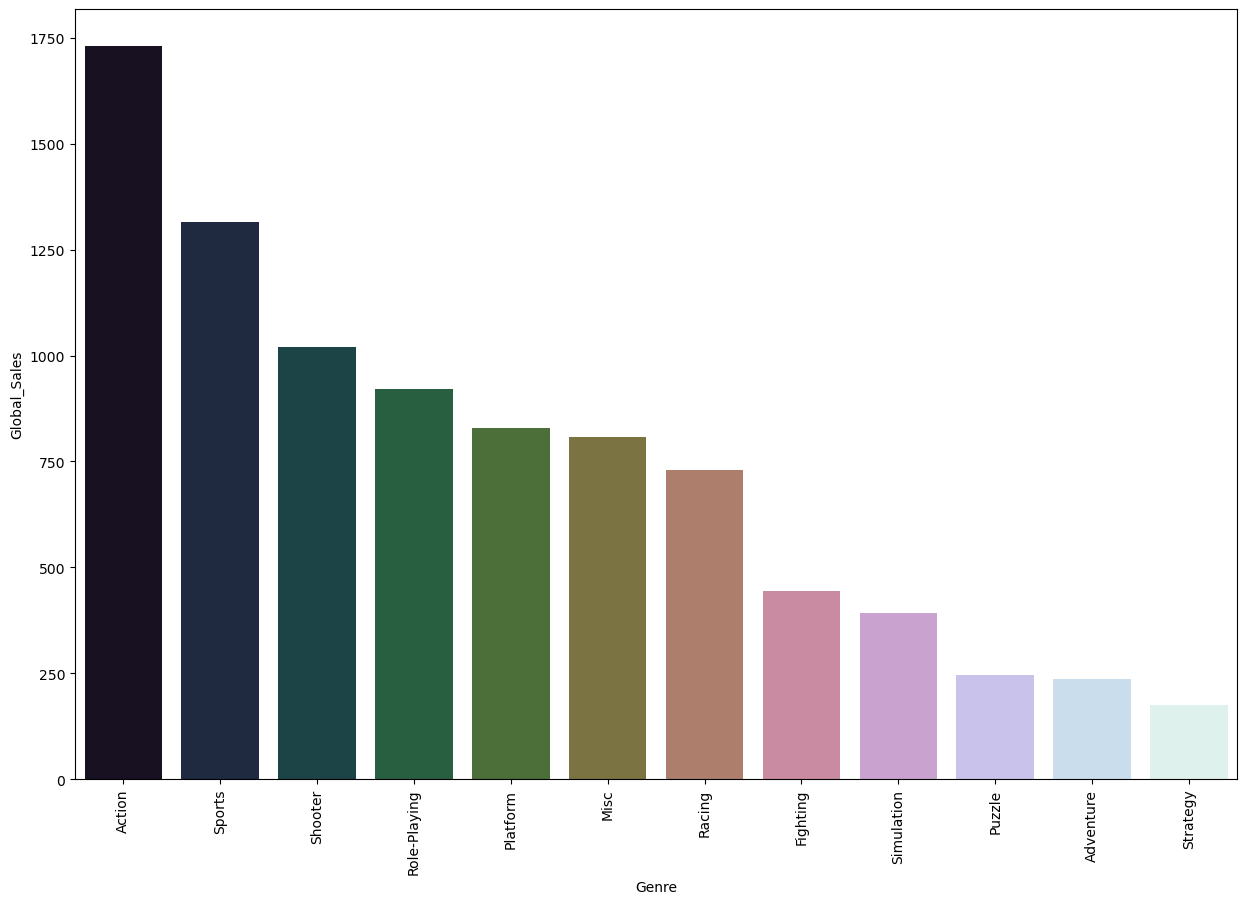

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x='Genre', y='Global_Sales',data=vg_genre,palette='cubehelix')
plt.xticks(rotation=90)
plt.show()

# 6. Which Platform have the highest sale price globally ?

In [22]:
vg_platform = vg.groupby(by=['Platform'])['Global_Sales'].sum()
vg_platform=vg_platform.reset_index()
vg_platform=vg_platform.sort_values(by=['Global_Sales'],ascending=False)


C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9460\2445464812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=vg_platform, palette='viridis_r')


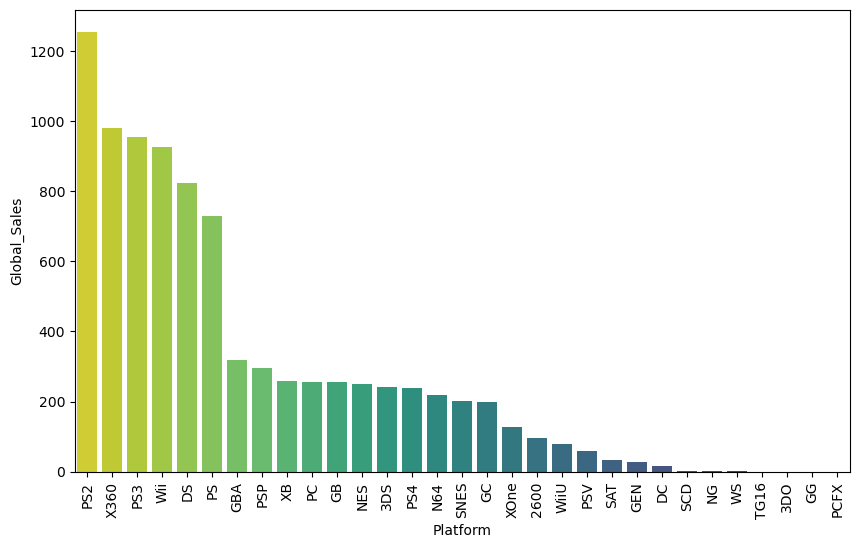

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Platform', y='Global_Sales', data=vg_platform, palette='viridis_r')
plt.xticks(rotation=90)
plt.show()

# 7. Sales Comparision by Genre

In [25]:
comp_genre=vg[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
comp_map=comp_genre.groupby(by=['Genre']).sum()
                 

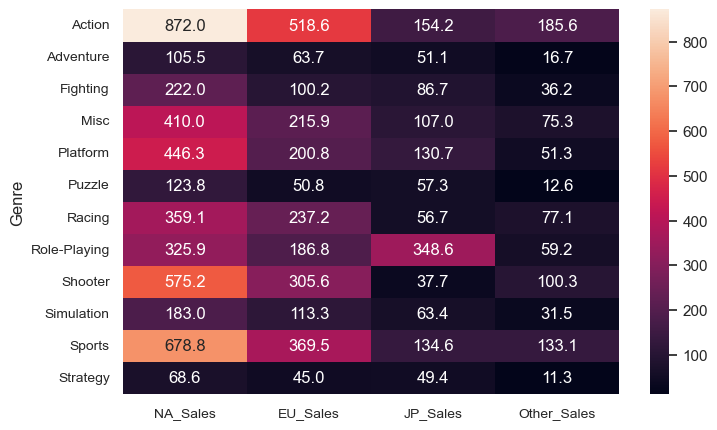

In [26]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt='.1f')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [27]:
comp_table=comp_map.reset_index()
comp_table=pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area',value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


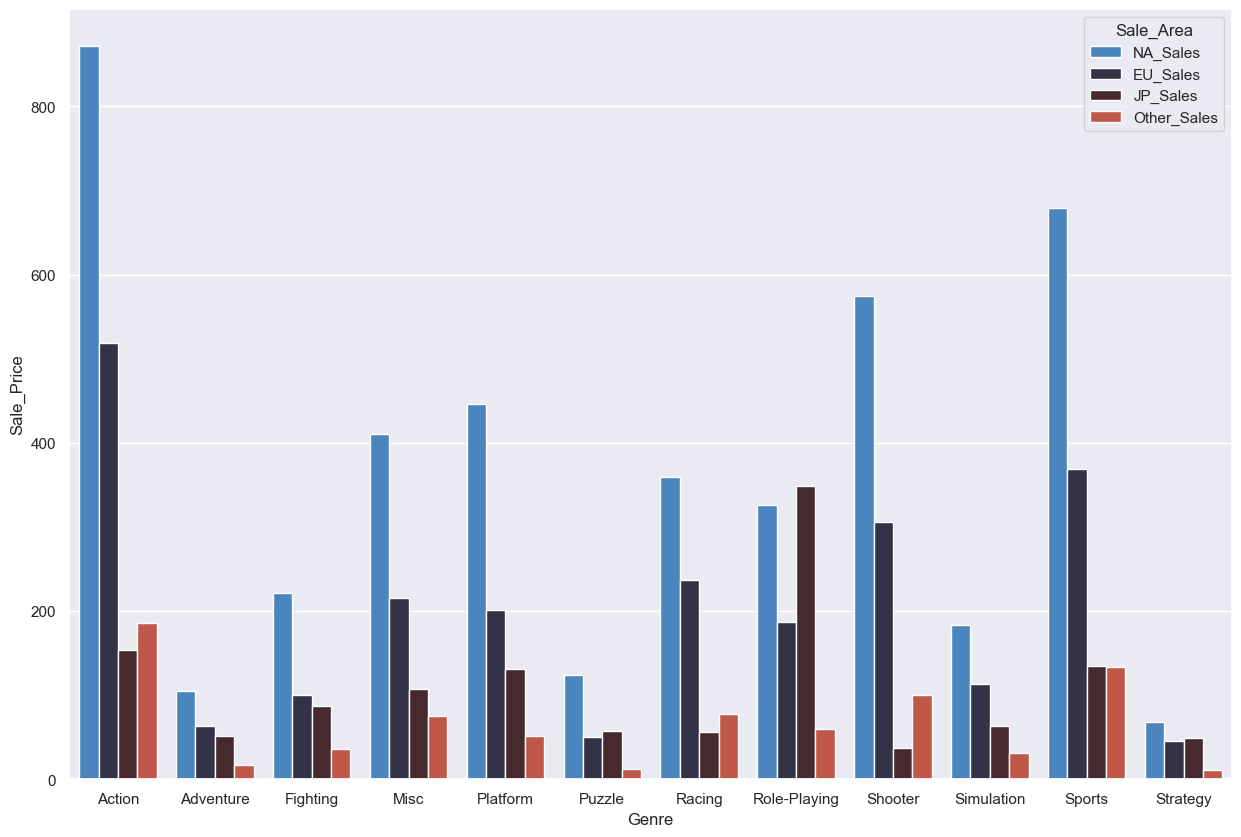

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='Genre',y='Sale_Price', hue='Sale_Area', data=comp_table, palette='icefire')
plt.show()

# 8. Sales Comparison by Platform

In [30]:
comp_platform=vg[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [31]:
comp_platform=comp_platform.groupby(by=['Platform']).sum().reset_index()

In [32]:
platformcomp_table=pd.melt(comp_platform, id_vars=['Platform'],value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
platformcomp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


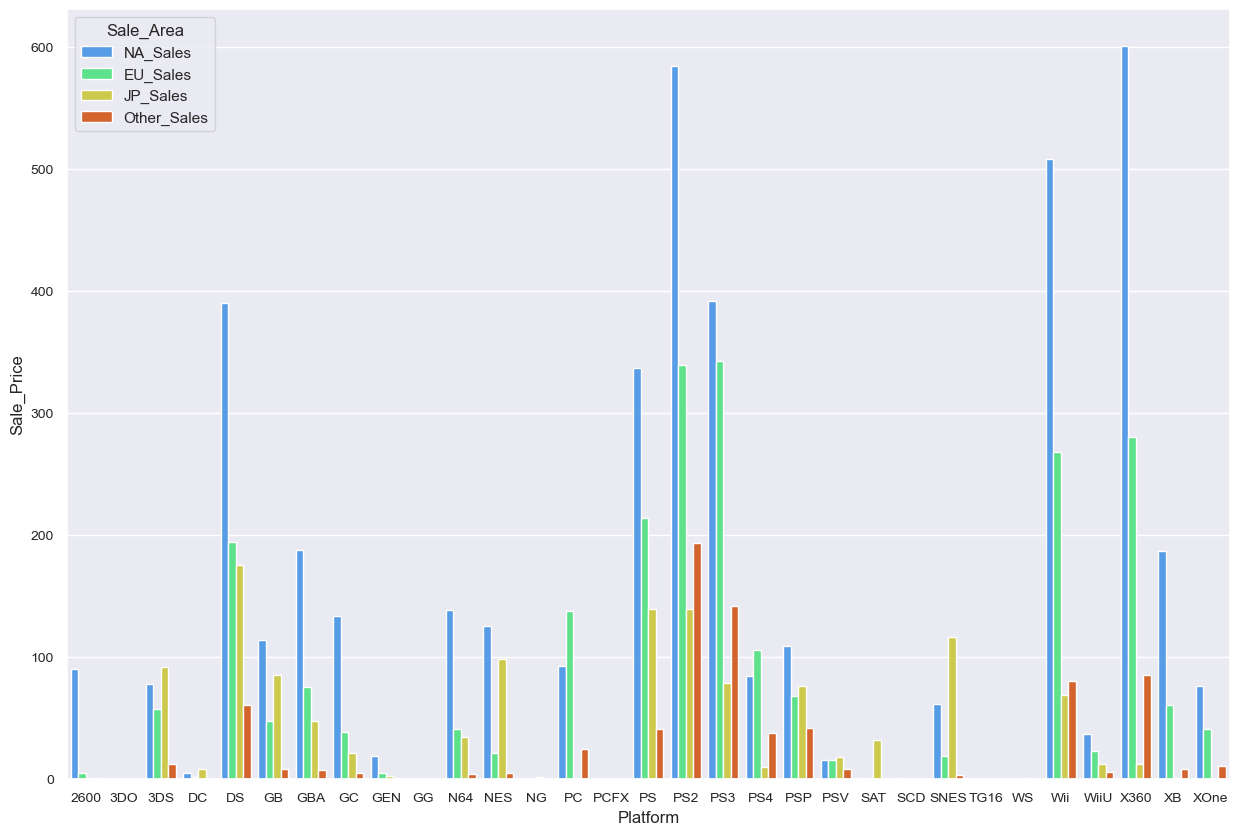

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area',data=platformcomp_table, palette='turbo')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 9. Top 20 Publishers

In [60]:
top_publishers=vg.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publishers=pd.DataFrame(top_publishers).reset_index()

C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9460\4283842680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Publisher', data=vg, palette='coolwarm', order=vg.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)


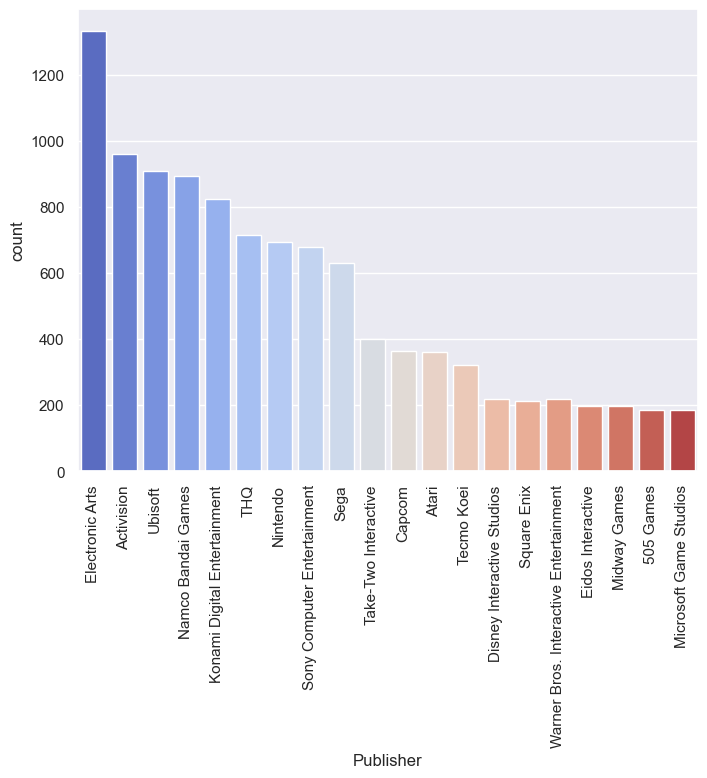

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(x='Publisher', data=vg, palette='coolwarm', order=vg.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

# 10. Total global sales by publishers

In [89]:
sale_publisher = vg[['Publisher', 'Global_Sales']]
sale_publisher = sale_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_publisher = pd.DataFrame(sale_publisher).reset_index()

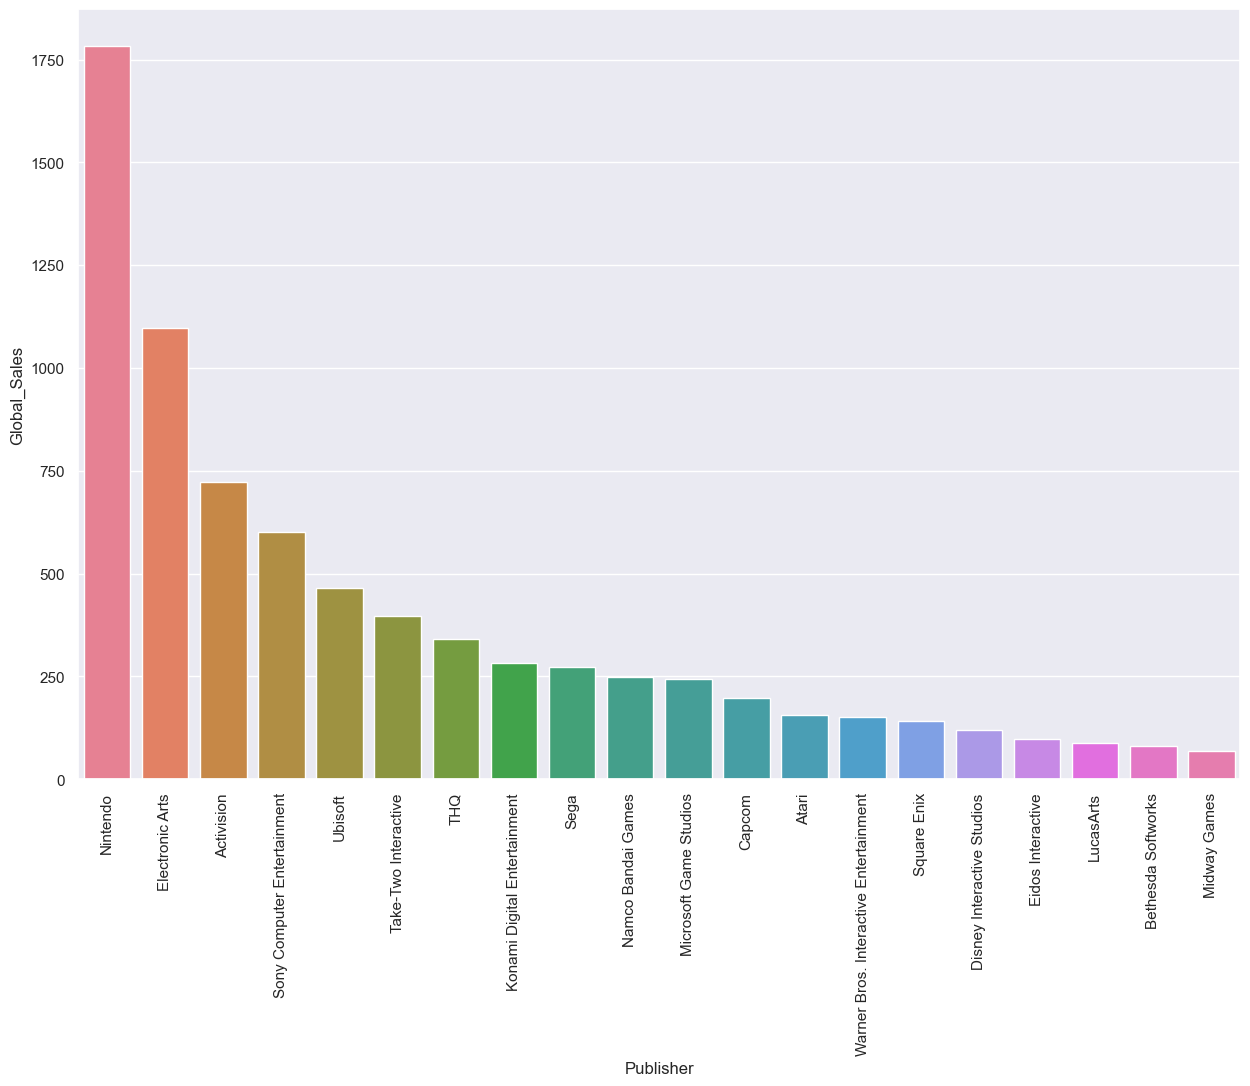

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(x='Publisher',y='Global_Sales', data=sale_publisher, hue='Publisher')
plt.xticks(rotation=90)
plt.show()

# 11. Publisher Comparision

In [112]:
comp_publisher = vg[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [116]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [118]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9460\2610408879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publisher', y='Sale_Price', palette='gist_stern', data=comp_publisher)


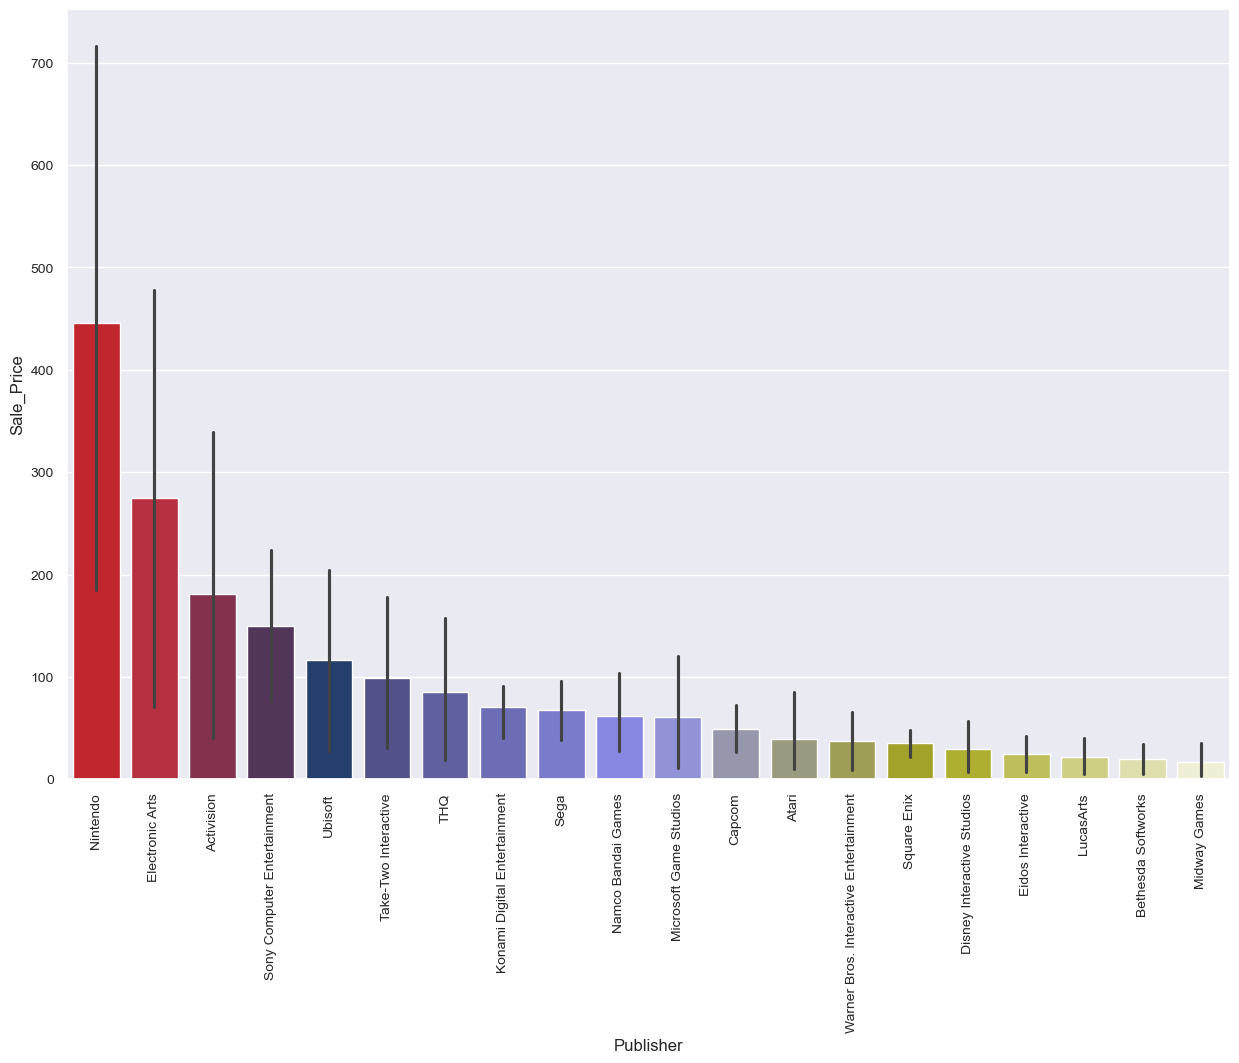

In [140]:
plt.figure(figsize=(15,10))
sns.barplot(x='Publisher', y='Sale_Price', palette='gist_stern', data=comp_publisher)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

# 12. Total Revenue by region

In [158]:
sale_regn = vg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sale_regn = sale_regn.sum().reset_index()
sale_regn = sale_regn.rename(columns={"index":"region", 0:"sale"})
sale_regn

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9460\1784851384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sale', data= sale_regn, palette = 'gist_earth')


<Axes: xlabel='region', ylabel='sale'>

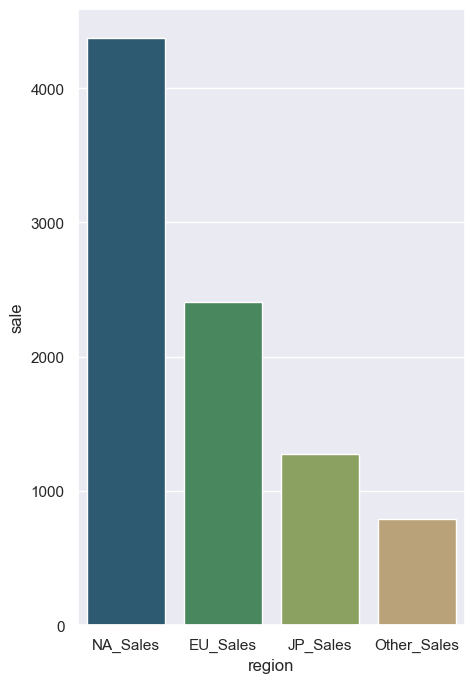

In [166]:
plt.figure(figsize=(5,8))
sns.barplot(x='region', y='sale', data= sale_regn, palette = 'gist_earth')

# 13. Pie chart of region sale

In [171]:
labels = sale_regn['region']
sizes = sale_regn['sale']

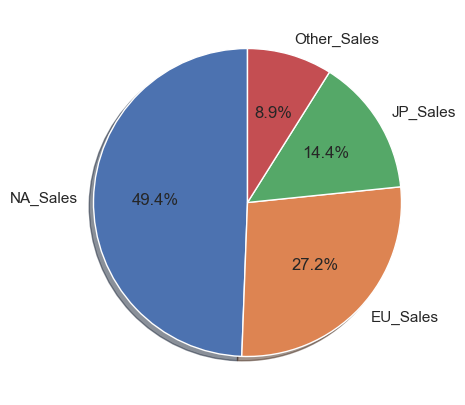

In [179]:
plt.figure(figsize=(8,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# 14. Relations of columns

In [188]:
vg_pair = vg.loc[:,['Year','Platform','Genre','NA_Sales', 'EU_Sales','Other_Sales']]
vg_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


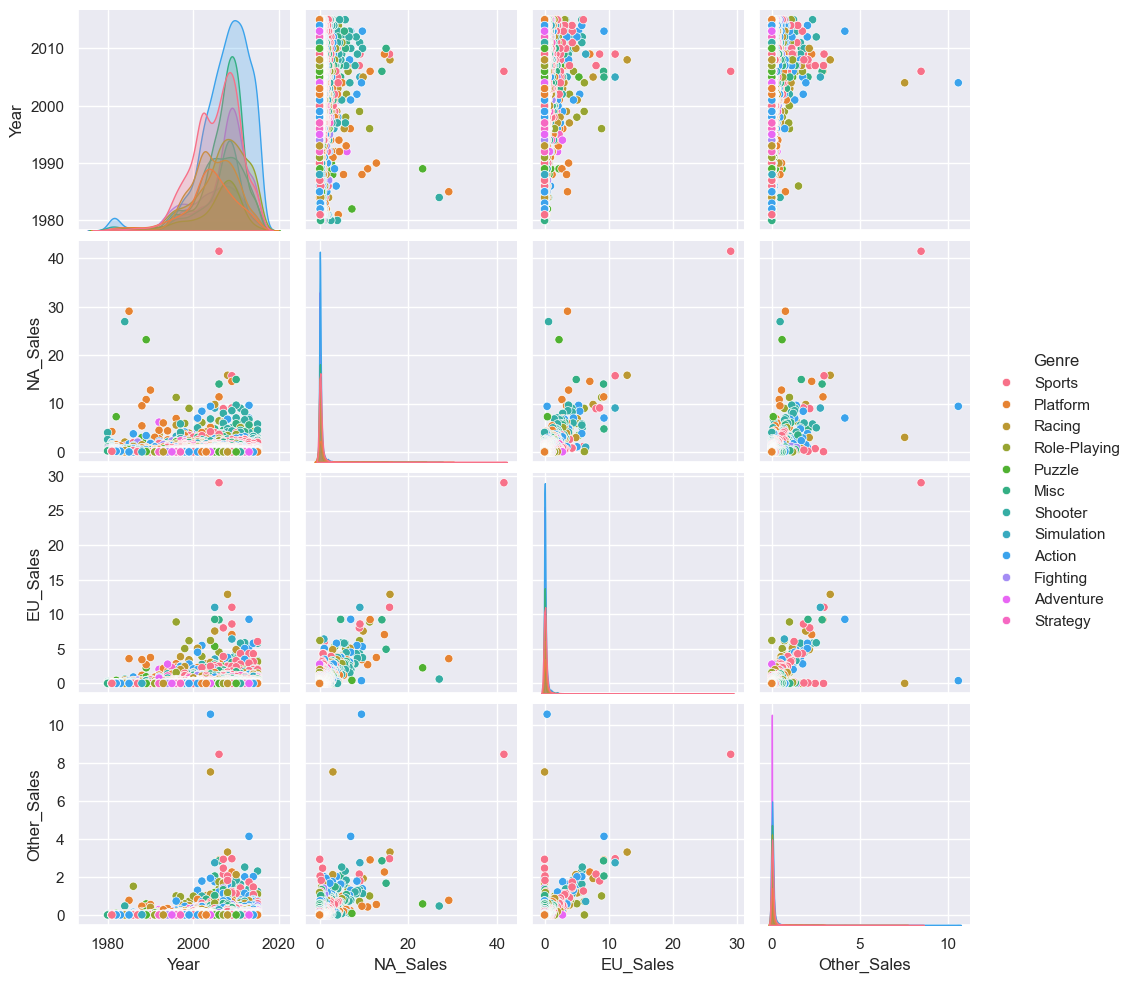

In [194]:
sns.pairplot(vg_pair, hue='Genre')
plt.show()